In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


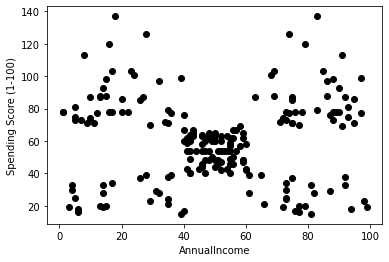

In [3]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]]
#Visualise data points
plt.scatter(X["Spending Score (1-100)"],X["Annual Income (k$)"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Spending Score (1-100)')
plt.show()

C:\Users\Kawsikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


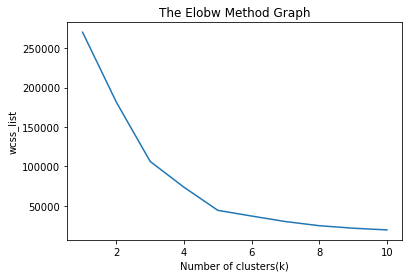

In [4]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

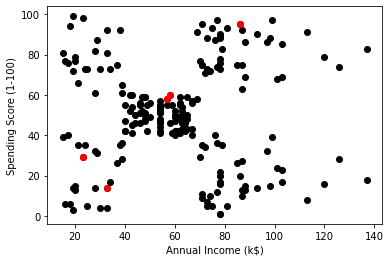

In [5]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=5
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [6]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]

C:\Users\Kawsikan\AppData\Local\Temp/ipykernel_19084/487212965.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


0.9393881523007046
4.120948835586425
-5.410176742647749
0.28690046652536694
0.0


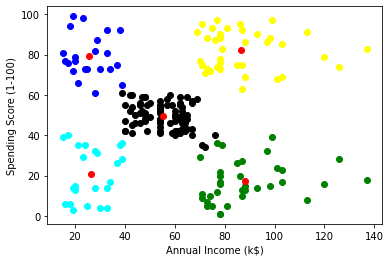

In [8]:
color=['blue','green','cyan','yellow','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()